In [1]:
import torch
from torchtext import data, datasets
from torch.utils.data import DataLoader
from torchvision import datasets as tv_datasets, transforms
import torch.nn as nn


from models import MNISTModel, SSTModel
from utils import train_and_track_mnist, train_and_track_sst, initialize_weights, reset_model_to_initial_weights
from optimizers import get_optimizers
from visualization import visualize_trajectories, plot_loss_with_epoch_and_time

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("mps")


In [3]:
num_epochs = 20
num_initialization = 5
batch_size = 128
criterion = nn.CrossEntropyLoss()

In [4]:
optimizers = get_optimizers()


In [5]:
# MNIST

transform = transforms.Compose([
    transforms.ToTensor(), # Convert images to PyTorch tensor format
    transforms.Normalize((0.5,), (0.5,))
])

mnist_train = tv_datasets.MNIST(root='./data', train=True, transform=transform, download=True)
#mnist_test = tv_datasets.MNIST(root='./data', train=False, transform=transform, download=True)

mnist_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
initial_weights_list_mnist = []
for _ in range(num_initialization):
    model = MNISTModel()
    initialize_weights(model)
    initial_weights_list_mnist.append({name: param.clone() for name, param in model.state_dict().items()}) # Save the model's initial weights as a dictionary


In [7]:
all_trajectories_mnist = []  # Stores the parameter trajectories for each optimizer and initialization
all_labels_mnist = []        # Stores labels for each optimizer and initialization
all_losses_mnist = []        # Stores loss values for each epoch
all_times_mnist = []         # Stores the time taken for each epoch

for optimizer_name, optimizer_fn in optimizers.items():
    print(f"Training with {optimizer_name} on MNIST")
    for i, initial_weights in enumerate(initial_weights_list_mnist):
        print(f"Starting from Initial Point {i+1}")

        model = MNISTModel().to(device)
        reset_model_to_initial_weights(model, initial_weights)
        optimizer = optimizer_fn(model)

        trajectory, losses, times = train_and_track_mnist(model, mnist_loader, optimizer, criterion, num_epochs)
        all_trajectories_mnist.append(trajectory)
        all_losses_mnist.append(losses)
        all_times_mnist.append(times)
        all_labels_mnist.append(f"{optimizer_name} - Point {i+1}")


Training with SGD on MNIST
Starting from Initial Point 1
Epoch: 0
Epoch 1/20 - Loss: 1.5003 - Time: 3.01 seconds
Epoch: 1
Epoch 2/20 - Loss: 0.5379 - Time: 2.50 seconds
Epoch: 2
Epoch 3/20 - Loss: 0.4035 - Time: 2.50 seconds
Epoch: 3
Epoch 4/20 - Loss: 0.3567 - Time: 2.79 seconds
Epoch: 4
Epoch 5/20 - Loss: 0.3301 - Time: 2.79 seconds
Epoch: 5
Epoch 6/20 - Loss: 0.3108 - Time: 2.66 seconds
Epoch: 6
Epoch 7/20 - Loss: 0.2953 - Time: 2.55 seconds
Epoch: 7
Epoch 8/20 - Loss: 0.2817 - Time: 2.61 seconds
Epoch: 8
Epoch 9/20 - Loss: 0.2701 - Time: 2.51 seconds
Epoch: 9
Epoch 10/20 - Loss: 0.2579 - Time: 2.51 seconds
Epoch: 10
Epoch 11/20 - Loss: 0.2476 - Time: 2.52 seconds
Epoch: 11
Epoch 12/20 - Loss: 0.2374 - Time: 2.60 seconds
Epoch: 12
Epoch 13/20 - Loss: 0.2270 - Time: 2.73 seconds
Epoch: 13
Epoch 14/20 - Loss: 0.2170 - Time: 2.98 seconds
Epoch: 14
Epoch 15/20 - Loss: 0.2074 - Time: 2.73 seconds
Epoch: 15
Epoch 16/20 - Loss: 0.1985 - Time: 2.54 seconds
Epoch: 16
Epoch 17/20 - Loss: 0.19


Initial Point 1 - Epoch vs Loss
Optimizer: SGD, Epoch: 0, Loss: 1.5003
Optimizer: SGD, Epoch: 1, Loss: 0.5379
Optimizer: SGD, Epoch: 2, Loss: 0.4035
Optimizer: SGD, Epoch: 3, Loss: 0.3567
Optimizer: SGD, Epoch: 4, Loss: 0.3301
Optimizer: SGD, Epoch: 5, Loss: 0.3108
Optimizer: SGD, Epoch: 6, Loss: 0.2953
Optimizer: SGD, Epoch: 7, Loss: 0.2817
Optimizer: SGD, Epoch: 8, Loss: 0.2701
Optimizer: SGD, Epoch: 9, Loss: 0.2579
Optimizer: SGD, Epoch: 10, Loss: 0.2476
Optimizer: SGD, Epoch: 11, Loss: 0.2374
Optimizer: SGD, Epoch: 12, Loss: 0.2270
Optimizer: SGD, Epoch: 13, Loss: 0.2170
Optimizer: SGD, Epoch: 14, Loss: 0.2074
Optimizer: SGD, Epoch: 15, Loss: 0.1985
Optimizer: SGD, Epoch: 16, Loss: 0.1902
Optimizer: SGD, Epoch: 17, Loss: 0.1828
Optimizer: SGD, Epoch: 18, Loss: 0.1752
Optimizer: SGD, Epoch: 19, Loss: 0.1685
Optimizer: SGD with Momentum, Epoch: 0, Loss: 0.5554
Optimizer: SGD with Momentum, Epoch: 1, Loss: 0.2353
Optimizer: SGD with Momentum, Epoch: 2, Loss: 0.1702
Optimizer: SGD wit

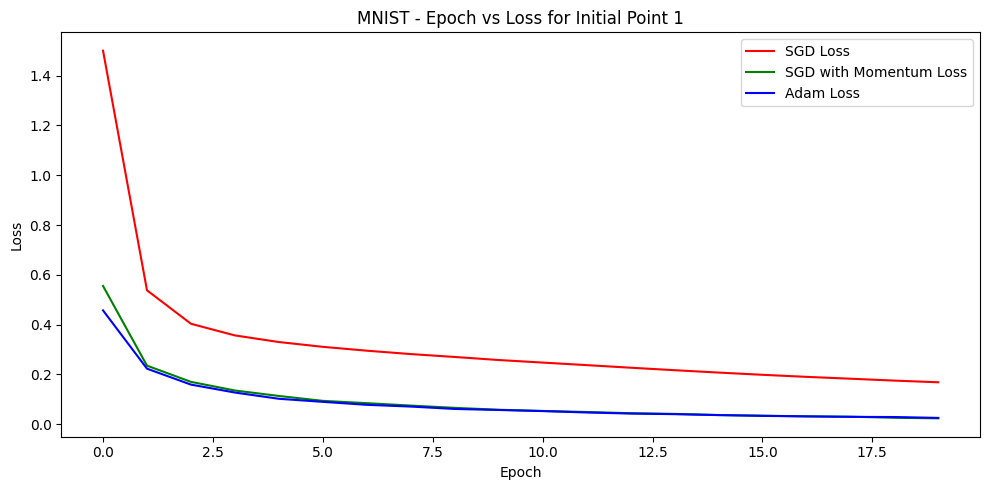


Initial Point 1 - Cumulative Time vs Loss
Optimizer: SGD, Time: 3.01, Loss: 1.5003
Optimizer: SGD, Time: 5.51, Loss: 0.5379
Optimizer: SGD, Time: 8.01, Loss: 0.4035
Optimizer: SGD, Time: 10.79, Loss: 0.3567
Optimizer: SGD, Time: 13.58, Loss: 0.3301
Optimizer: SGD, Time: 16.24, Loss: 0.3108
Optimizer: SGD, Time: 18.79, Loss: 0.2953
Optimizer: SGD, Time: 21.39, Loss: 0.2817
Optimizer: SGD, Time: 23.90, Loss: 0.2701
Optimizer: SGD, Time: 26.41, Loss: 0.2579
Optimizer: SGD, Time: 28.93, Loss: 0.2476
Optimizer: SGD, Time: 31.53, Loss: 0.2374
Optimizer: SGD, Time: 34.26, Loss: 0.2270
Optimizer: SGD, Time: 37.23, Loss: 0.2170
Optimizer: SGD, Time: 39.97, Loss: 0.2074
Optimizer: SGD, Time: 42.51, Loss: 0.1985
Optimizer: SGD, Time: 44.99, Loss: 0.1902
Optimizer: SGD, Time: 47.52, Loss: 0.1828
Optimizer: SGD, Time: 50.01, Loss: 0.1752
Optimizer: SGD, Time: 52.49, Loss: 0.1685
Optimizer: SGD with Momentum, Time: 2.84, Loss: 0.5554
Optimizer: SGD with Momentum, Time: 5.80, Loss: 0.2353
Optimizer:

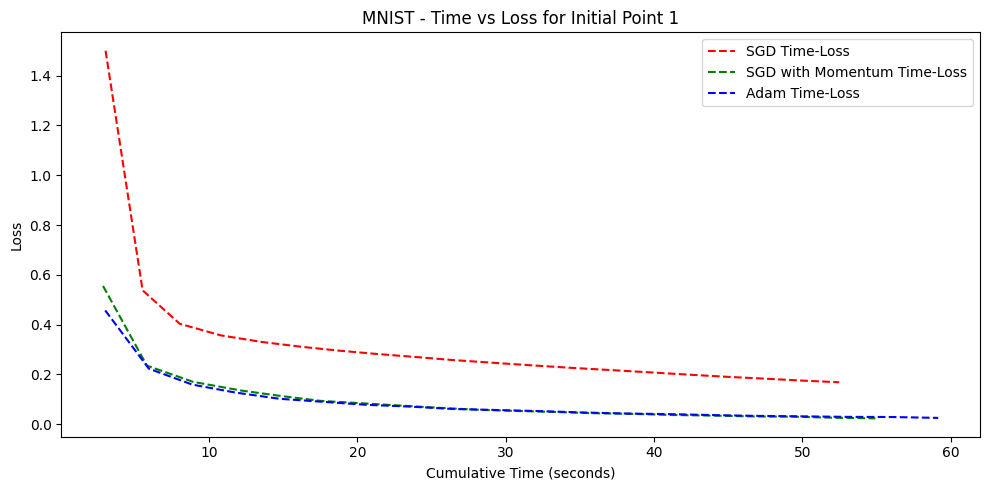


Initial Point 2 - Epoch vs Loss
Optimizer: SGD, Epoch: 0, Loss: 1.5421
Optimizer: SGD, Epoch: 1, Loss: 0.5473
Optimizer: SGD, Epoch: 2, Loss: 0.4091
Optimizer: SGD, Epoch: 3, Loss: 0.3601
Optimizer: SGD, Epoch: 4, Loss: 0.3323
Optimizer: SGD, Epoch: 5, Loss: 0.3122
Optimizer: SGD, Epoch: 6, Loss: 0.2958
Optimizer: SGD, Epoch: 7, Loss: 0.2819
Optimizer: SGD, Epoch: 8, Loss: 0.2700
Optimizer: SGD, Epoch: 9, Loss: 0.2589
Optimizer: SGD, Epoch: 10, Loss: 0.2489
Optimizer: SGD, Epoch: 11, Loss: 0.2387
Optimizer: SGD, Epoch: 12, Loss: 0.2293
Optimizer: SGD, Epoch: 13, Loss: 0.2207
Optimizer: SGD, Epoch: 14, Loss: 0.2121
Optimizer: SGD, Epoch: 15, Loss: 0.2044
Optimizer: SGD, Epoch: 16, Loss: 0.1966
Optimizer: SGD, Epoch: 17, Loss: 0.1897
Optimizer: SGD, Epoch: 18, Loss: 0.1835
Optimizer: SGD, Epoch: 19, Loss: 0.1769
Optimizer: SGD with Momentum, Epoch: 0, Loss: 0.5665
Optimizer: SGD with Momentum, Epoch: 1, Loss: 0.2387
Optimizer: SGD with Momentum, Epoch: 2, Loss: 0.1726
Optimizer: SGD wit

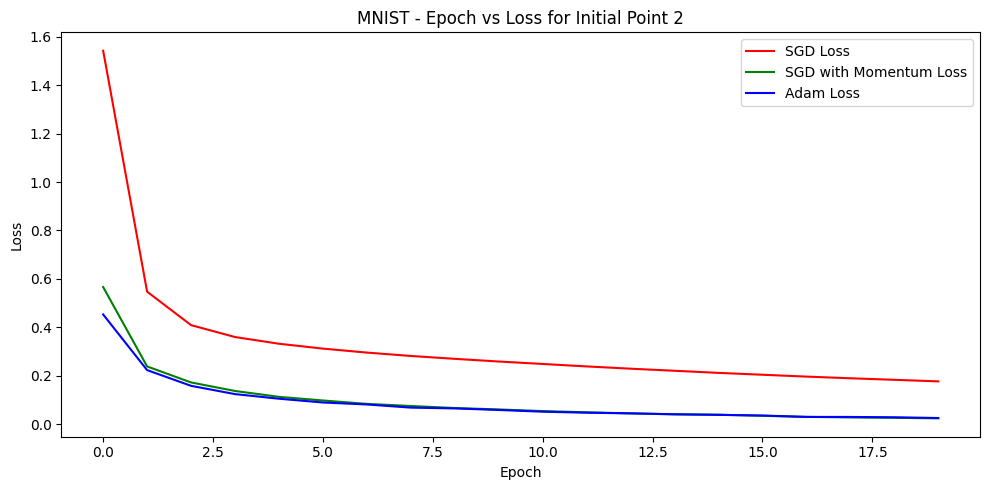


Initial Point 2 - Cumulative Time vs Loss
Optimizer: SGD, Time: 2.61, Loss: 1.5421
Optimizer: SGD, Time: 5.23, Loss: 0.5473
Optimizer: SGD, Time: 8.25, Loss: 0.4091
Optimizer: SGD, Time: 10.94, Loss: 0.3601
Optimizer: SGD, Time: 13.52, Loss: 0.3323
Optimizer: SGD, Time: 16.10, Loss: 0.3122
Optimizer: SGD, Time: 18.70, Loss: 0.2958
Optimizer: SGD, Time: 21.29, Loss: 0.2819
Optimizer: SGD, Time: 24.12, Loss: 0.2700
Optimizer: SGD, Time: 27.15, Loss: 0.2589
Optimizer: SGD, Time: 30.09, Loss: 0.2489
Optimizer: SGD, Time: 33.32, Loss: 0.2387
Optimizer: SGD, Time: 35.96, Loss: 0.2293
Optimizer: SGD, Time: 38.53, Loss: 0.2207
Optimizer: SGD, Time: 41.14, Loss: 0.2121
Optimizer: SGD, Time: 43.77, Loss: 0.2044
Optimizer: SGD, Time: 46.42, Loss: 0.1966
Optimizer: SGD, Time: 49.02, Loss: 0.1897
Optimizer: SGD, Time: 51.78, Loss: 0.1835
Optimizer: SGD, Time: 54.40, Loss: 0.1769
Optimizer: SGD with Momentum, Time: 2.76, Loss: 0.5665
Optimizer: SGD with Momentum, Time: 5.56, Loss: 0.2387
Optimizer:

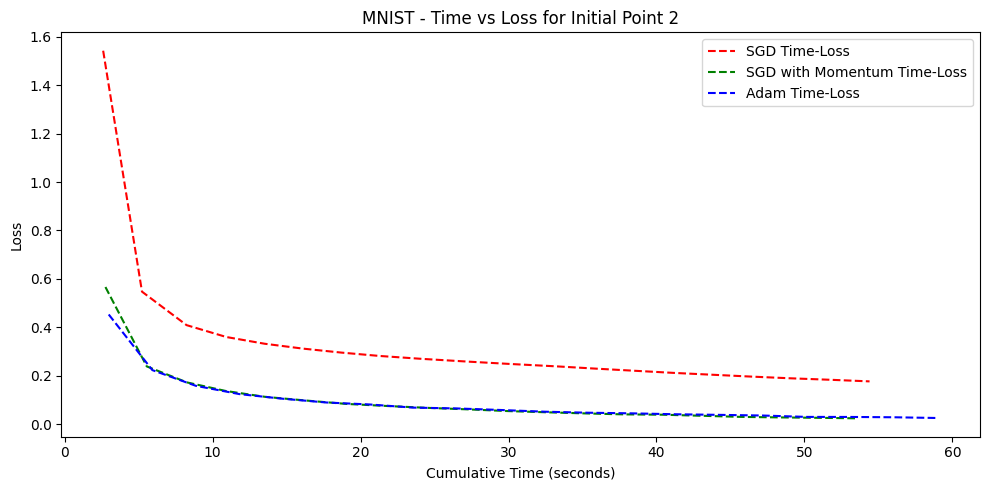


Initial Point 3 - Epoch vs Loss
Optimizer: SGD, Epoch: 0, Loss: 1.5095
Optimizer: SGD, Epoch: 1, Loss: 0.5476
Optimizer: SGD, Epoch: 2, Loss: 0.4049
Optimizer: SGD, Epoch: 3, Loss: 0.3581
Optimizer: SGD, Epoch: 4, Loss: 0.3317
Optimizer: SGD, Epoch: 5, Loss: 0.3138
Optimizer: SGD, Epoch: 6, Loss: 0.2987
Optimizer: SGD, Epoch: 7, Loss: 0.2862
Optimizer: SGD, Epoch: 8, Loss: 0.2739
Optimizer: SGD, Epoch: 9, Loss: 0.2636
Optimizer: SGD, Epoch: 10, Loss: 0.2535
Optimizer: SGD, Epoch: 11, Loss: 0.2441
Optimizer: SGD, Epoch: 12, Loss: 0.2349
Optimizer: SGD, Epoch: 13, Loss: 0.2258
Optimizer: SGD, Epoch: 14, Loss: 0.2172
Optimizer: SGD, Epoch: 15, Loss: 0.2087
Optimizer: SGD, Epoch: 16, Loss: 0.2005
Optimizer: SGD, Epoch: 17, Loss: 0.1928
Optimizer: SGD, Epoch: 18, Loss: 0.1854
Optimizer: SGD, Epoch: 19, Loss: 0.1783
Optimizer: SGD with Momentum, Epoch: 0, Loss: 0.5654
Optimizer: SGD with Momentum, Epoch: 1, Loss: 0.2317
Optimizer: SGD with Momentum, Epoch: 2, Loss: 0.1663
Optimizer: SGD wit

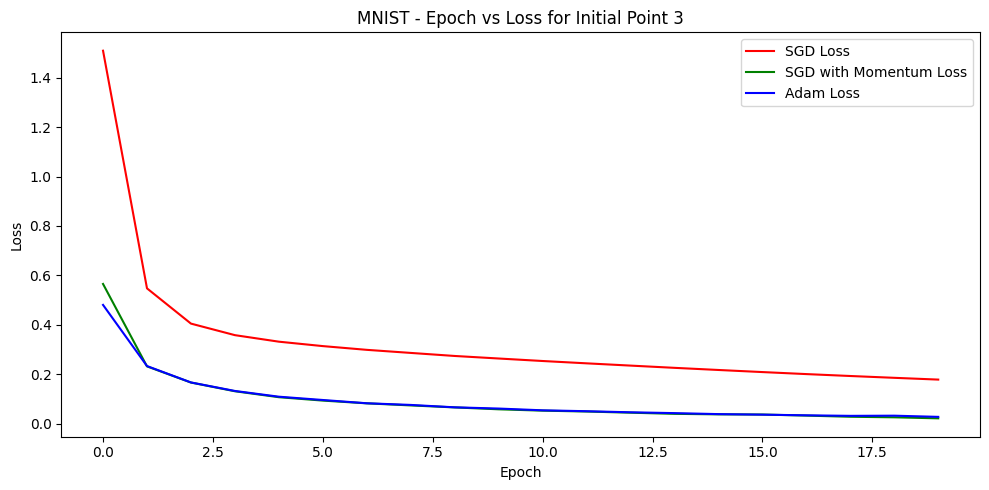


Initial Point 3 - Cumulative Time vs Loss
Optimizer: SGD, Time: 2.61, Loss: 1.5095
Optimizer: SGD, Time: 5.25, Loss: 0.5476
Optimizer: SGD, Time: 7.78, Loss: 0.4049
Optimizer: SGD, Time: 10.31, Loss: 0.3581
Optimizer: SGD, Time: 12.87, Loss: 0.3317
Optimizer: SGD, Time: 15.45, Loss: 0.3138
Optimizer: SGD, Time: 17.98, Loss: 0.2987
Optimizer: SGD, Time: 20.63, Loss: 0.2862
Optimizer: SGD, Time: 23.55, Loss: 0.2739
Optimizer: SGD, Time: 26.76, Loss: 0.2636
Optimizer: SGD, Time: 29.58, Loss: 0.2535
Optimizer: SGD, Time: 32.21, Loss: 0.2441
Optimizer: SGD, Time: 34.81, Loss: 0.2349
Optimizer: SGD, Time: 37.49, Loss: 0.2258
Optimizer: SGD, Time: 40.11, Loss: 0.2172
Optimizer: SGD, Time: 42.79, Loss: 0.2087
Optimizer: SGD, Time: 45.55, Loss: 0.2005
Optimizer: SGD, Time: 48.41, Loss: 0.1928
Optimizer: SGD, Time: 51.18, Loss: 0.1854
Optimizer: SGD, Time: 53.82, Loss: 0.1783
Optimizer: SGD with Momentum, Time: 2.60, Loss: 0.5654
Optimizer: SGD with Momentum, Time: 5.20, Loss: 0.2317
Optimizer:

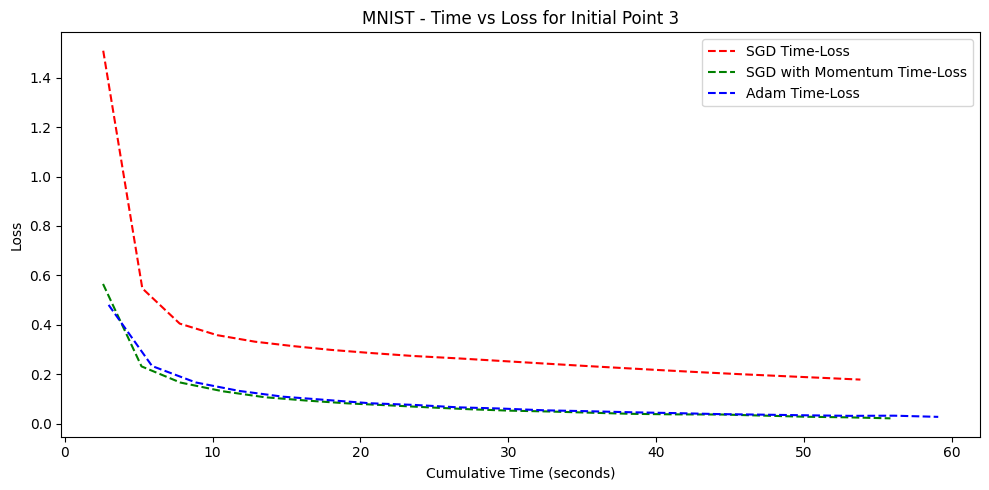


Initial Point 4 - Epoch vs Loss
Optimizer: SGD, Epoch: 0, Loss: 1.6114
Optimizer: SGD, Epoch: 1, Loss: 0.5650
Optimizer: SGD, Epoch: 2, Loss: 0.4103
Optimizer: SGD, Epoch: 3, Loss: 0.3629
Optimizer: SGD, Epoch: 4, Loss: 0.3359
Optimizer: SGD, Epoch: 5, Loss: 0.3161
Optimizer: SGD, Epoch: 6, Loss: 0.2996
Optimizer: SGD, Epoch: 7, Loss: 0.2847
Optimizer: SGD, Epoch: 8, Loss: 0.2721
Optimizer: SGD, Epoch: 9, Loss: 0.2598
Optimizer: SGD, Epoch: 10, Loss: 0.2485
Optimizer: SGD, Epoch: 11, Loss: 0.2379
Optimizer: SGD, Epoch: 12, Loss: 0.2272
Optimizer: SGD, Epoch: 13, Loss: 0.2175
Optimizer: SGD, Epoch: 14, Loss: 0.2085
Optimizer: SGD, Epoch: 15, Loss: 0.1993
Optimizer: SGD, Epoch: 16, Loss: 0.1912
Optimizer: SGD, Epoch: 17, Loss: 0.1841
Optimizer: SGD, Epoch: 18, Loss: 0.1769
Optimizer: SGD, Epoch: 19, Loss: 0.1696
Optimizer: SGD with Momentum, Epoch: 0, Loss: 0.5807
Optimizer: SGD with Momentum, Epoch: 1, Loss: 0.2389
Optimizer: SGD with Momentum, Epoch: 2, Loss: 0.1715
Optimizer: SGD wit

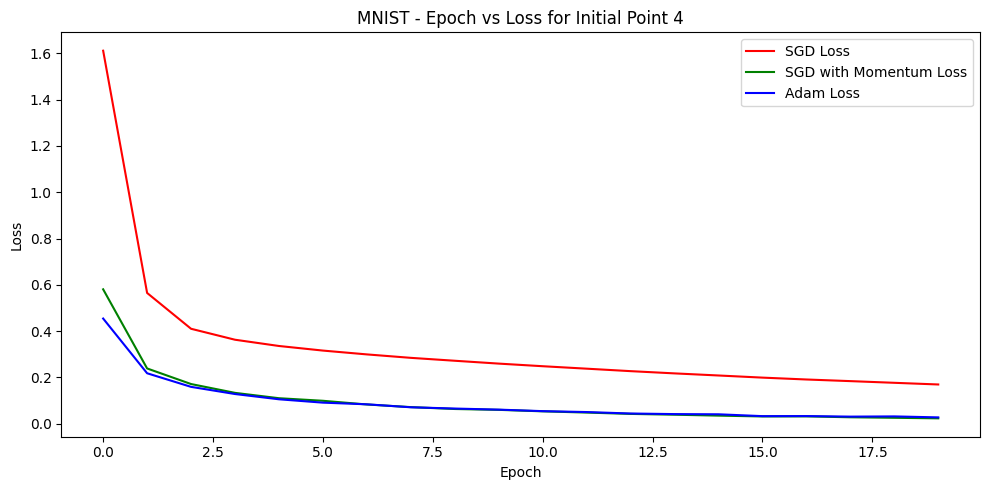


Initial Point 4 - Cumulative Time vs Loss
Optimizer: SGD, Time: 2.63, Loss: 1.6114
Optimizer: SGD, Time: 5.25, Loss: 0.5650
Optimizer: SGD, Time: 7.84, Loss: 0.4103
Optimizer: SGD, Time: 10.39, Loss: 0.3629
Optimizer: SGD, Time: 12.95, Loss: 0.3359
Optimizer: SGD, Time: 15.49, Loss: 0.3161
Optimizer: SGD, Time: 18.06, Loss: 0.2996
Optimizer: SGD, Time: 20.65, Loss: 0.2847
Optimizer: SGD, Time: 23.24, Loss: 0.2721
Optimizer: SGD, Time: 25.86, Loss: 0.2598
Optimizer: SGD, Time: 28.46, Loss: 0.2485
Optimizer: SGD, Time: 31.12, Loss: 0.2379
Optimizer: SGD, Time: 33.73, Loss: 0.2272
Optimizer: SGD, Time: 36.35, Loss: 0.2175
Optimizer: SGD, Time: 38.95, Loss: 0.2085
Optimizer: SGD, Time: 41.56, Loss: 0.1993
Optimizer: SGD, Time: 44.16, Loss: 0.1912
Optimizer: SGD, Time: 46.87, Loss: 0.1841
Optimizer: SGD, Time: 49.54, Loss: 0.1769
Optimizer: SGD, Time: 52.20, Loss: 0.1696
Optimizer: SGD with Momentum, Time: 2.90, Loss: 0.5807
Optimizer: SGD with Momentum, Time: 5.81, Loss: 0.2389
Optimizer:

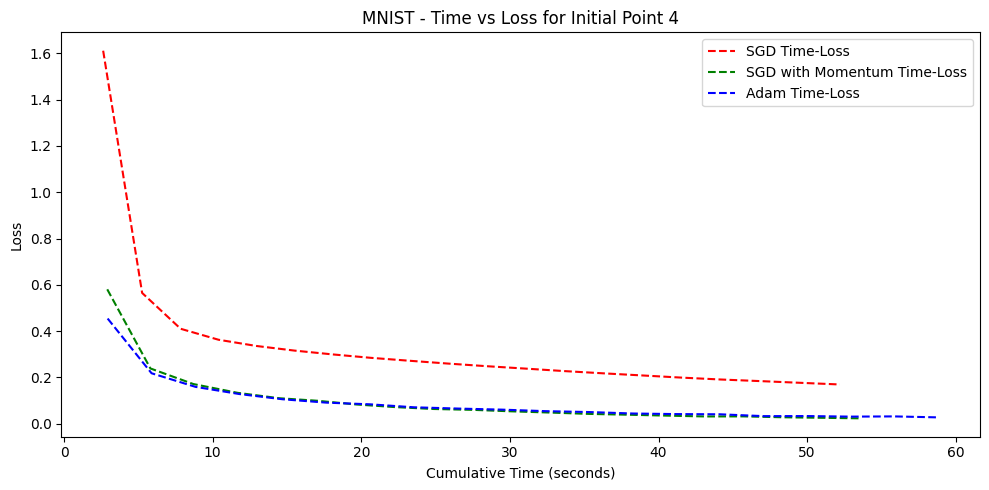


Initial Point 5 - Epoch vs Loss
Optimizer: SGD, Epoch: 0, Loss: 1.5339
Optimizer: SGD, Epoch: 1, Loss: 0.5389
Optimizer: SGD, Epoch: 2, Loss: 0.4010
Optimizer: SGD, Epoch: 3, Loss: 0.3540
Optimizer: SGD, Epoch: 4, Loss: 0.3272
Optimizer: SGD, Epoch: 5, Loss: 0.3067
Optimizer: SGD, Epoch: 6, Loss: 0.2912
Optimizer: SGD, Epoch: 7, Loss: 0.2774
Optimizer: SGD, Epoch: 8, Loss: 0.2643
Optimizer: SGD, Epoch: 9, Loss: 0.2532
Optimizer: SGD, Epoch: 10, Loss: 0.2427
Optimizer: SGD, Epoch: 11, Loss: 0.2324
Optimizer: SGD, Epoch: 12, Loss: 0.2224
Optimizer: SGD, Epoch: 13, Loss: 0.2133
Optimizer: SGD, Epoch: 14, Loss: 0.2049
Optimizer: SGD, Epoch: 15, Loss: 0.1971
Optimizer: SGD, Epoch: 16, Loss: 0.1897
Optimizer: SGD, Epoch: 17, Loss: 0.1823
Optimizer: SGD, Epoch: 18, Loss: 0.1762
Optimizer: SGD, Epoch: 19, Loss: 0.1697
Optimizer: SGD with Momentum, Epoch: 0, Loss: 0.5605
Optimizer: SGD with Momentum, Epoch: 1, Loss: 0.2303
Optimizer: SGD with Momentum, Epoch: 2, Loss: 0.1695
Optimizer: SGD wit

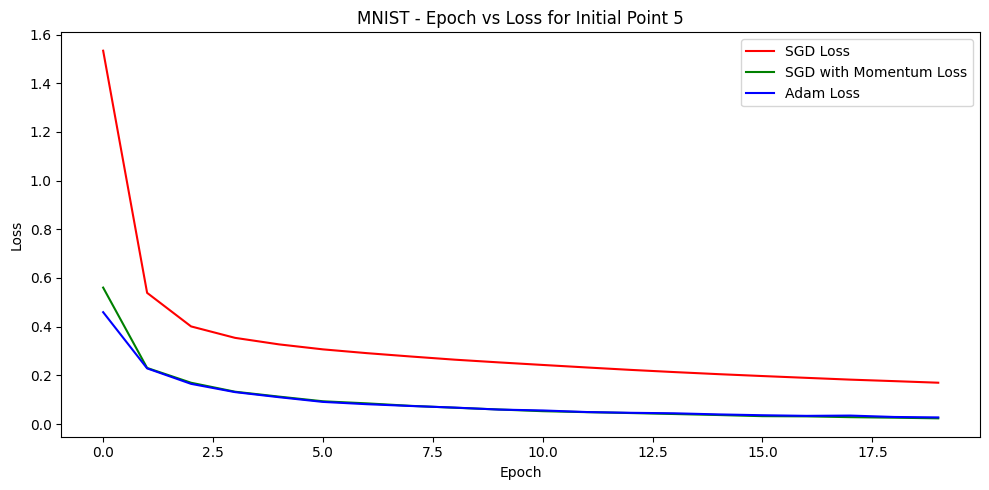


Initial Point 5 - Cumulative Time vs Loss
Optimizer: SGD, Time: 2.66, Loss: 1.5339
Optimizer: SGD, Time: 5.47, Loss: 0.5389
Optimizer: SGD, Time: 8.59, Loss: 0.4010
Optimizer: SGD, Time: 11.36, Loss: 0.3540
Optimizer: SGD, Time: 14.12, Loss: 0.3272
Optimizer: SGD, Time: 16.74, Loss: 0.3067
Optimizer: SGD, Time: 19.66, Loss: 0.2912
Optimizer: SGD, Time: 22.75, Loss: 0.2774
Optimizer: SGD, Time: 25.56, Loss: 0.2643
Optimizer: SGD, Time: 28.71, Loss: 0.2532
Optimizer: SGD, Time: 31.78, Loss: 0.2427
Optimizer: SGD, Time: 34.84, Loss: 0.2324
Optimizer: SGD, Time: 37.58, Loss: 0.2224
Optimizer: SGD, Time: 40.27, Loss: 0.2133
Optimizer: SGD, Time: 42.98, Loss: 0.2049
Optimizer: SGD, Time: 45.68, Loss: 0.1971
Optimizer: SGD, Time: 48.38, Loss: 0.1897
Optimizer: SGD, Time: 51.11, Loss: 0.1823
Optimizer: SGD, Time: 53.80, Loss: 0.1762
Optimizer: SGD, Time: 56.51, Loss: 0.1697
Optimizer: SGD with Momentum, Time: 2.61, Loss: 0.5605
Optimizer: SGD with Momentum, Time: 5.21, Loss: 0.2303
Optimizer:

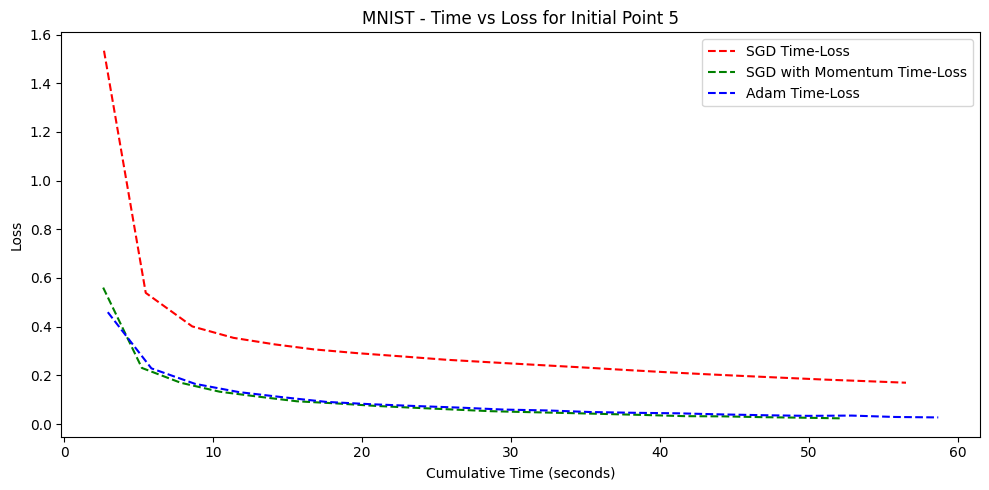

In [9]:
# MNIST Training
plot_loss_with_epoch_and_time(
    losses=all_losses_mnist,
    times=all_times_mnist,
    labels=all_labels_mnist,
    data_name="MNIST",
    num_initial_points=num_initialization 
)

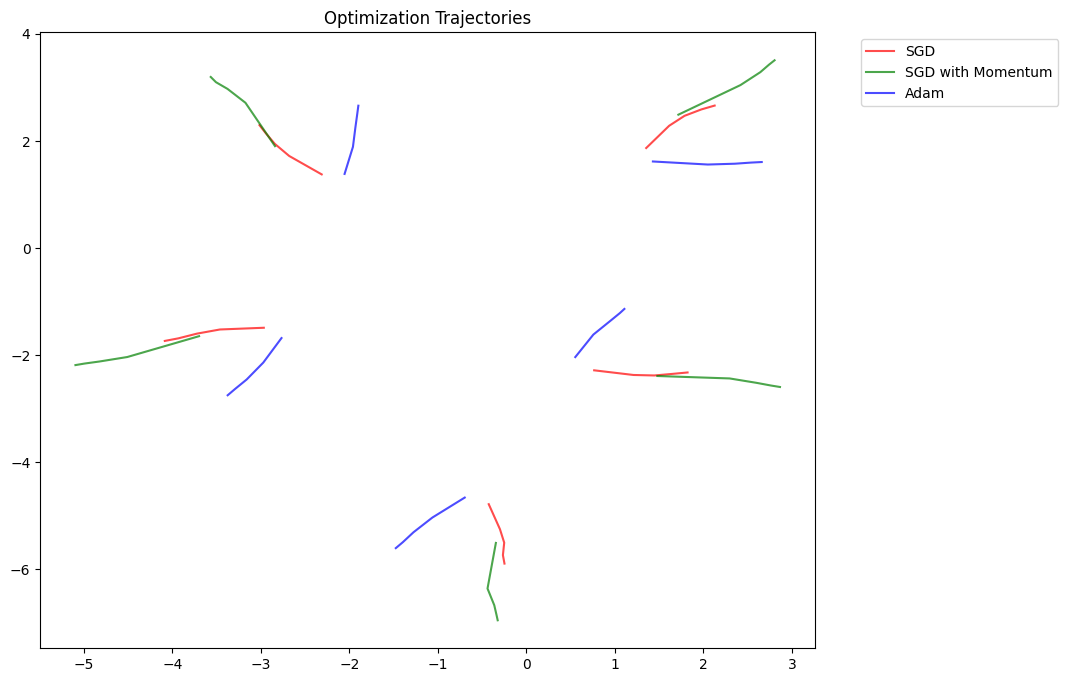

In [8]:
visualize_trajectories(all_trajectories_mnist, all_labels_mnist, optimizers.keys())


In [ ]:
# SST
TEXT = data.Field(tokenize="basic_english", lower=True, batch_first=True)
LABEL = data.LabelField(dtype=torch.float)
train_data, _, _ = datasets.SST.splits(TEXT, LABEL, fine_grained=False, train_subtrees=False)

TEXT.build_vocab(
    train_data,                # Build vocabulary based on training data
    max_size=10000             # Limit the vocabulary size to 10,000 most frequent tokens
)
LABEL.build_vocab(train_data)

sst_loader = data.BucketIterator.splits(
    (train_data,), batch_size=batch_size, device=device
)


In [7]:
initial_weights_list_sst = []
for _ in range(num_initialization):
    sst_model = SSTModel(vocab_size=len(TEXT.vocab), embed_dim=100, num_classes=2)
    initialize_weights(sst_model)
    initial_weights_list_sst.append({name: param.clone() for name, param in sst_model.state_dict().items()})


In [ ]:
all_trajectories_sst = []  # Stores the parameter trajectories for each optimizer and initialization
all_labels_sst = []        # Stores labels for each optimizer and initialization
all_losses_sst = []        # Stores loss values for each epoch
all_times_sst = []         # Stores the time taken for each epoch

for optimizer_name, optimizer_fn in optimizers.items():
    print(f"Training with {optimizer_name} on SST")

    for i, initial_weights in enumerate(initial_weights_list_sst):
        print(f"Starting from Initial Point {i+1}")

        sst_model = SSTModel(vocab_size=len(TEXT.vocab), embed_dim=100, num_classes=2).to(device)
        reset_model_to_initial_weights(sst_model, initial_weights)
        optimizer = optimizer_fn(sst_model)

        trajectory, losses, times = train_and_track_sst(sst_model, sst_loader[0], optimizer, criterion, num_epochs)
        all_trajectories_sst.append(trajectory)
        all_losses_sst.append(losses)
        all_times_sst.append(times)
        all_labels_sst.append(f"{optimizer_name} - Point {i+1}")




Training with SGD on SST
Starting from Initial Point 1
Epoch 1/60 - Loss: 0.5632 - Time: 0.67 seconds
Epoch 2/60 - Loss: 0.5619 - Time: 0.29 seconds
Epoch 3/60 - Loss: 0.5611 - Time: 0.34 seconds
Epoch 4/60 - Loss: 0.5607 - Time: 0.48 seconds
Epoch 5/60 - Loss: 0.5597 - Time: 0.55 seconds
Epoch 6/60 - Loss: 0.5589 - Time: 0.47 seconds
Epoch 7/60 - Loss: 0.5579 - Time: 0.46 seconds
Epoch 8/60 - Loss: 0.5574 - Time: 0.44 seconds
Epoch 9/60 - Loss: 0.5569 - Time: 0.47 seconds
Epoch 10/60 - Loss: 0.5561 - Time: 0.47 seconds
Epoch 11/60 - Loss: 0.5550 - Time: 0.52 seconds
Epoch 12/60 - Loss: 0.5545 - Time: 0.48 seconds
Epoch 13/60 - Loss: 0.5536 - Time: 0.52 seconds
Epoch 14/60 - Loss: 0.5535 - Time: 0.64 seconds
Epoch 15/60 - Loss: 0.5528 - Time: 0.63 seconds
Epoch 16/60 - Loss: 0.5523 - Time: 0.60 seconds
Epoch 17/60 - Loss: 0.5519 - Time: 0.51 seconds
Epoch 18/60 - Loss: 0.5512 - Time: 0.49 seconds
Epoch 19/60 - Loss: 0.5506 - Time: 0.52 seconds
Epoch 20/60 - Loss: 0.5502 - Time: 0.49 se

In [ ]:
plot_loss_with_epoch_and_time(
    losses=all_losses_sst,
    times=all_times_sst,
    labels=all_labels_sst,
    data_name="SST",
    num_initial_points=num_initialization  
)

In [30]:
import importlib
import visualization
importlib.reload(visualization)
from visualization import visualize_trajectories

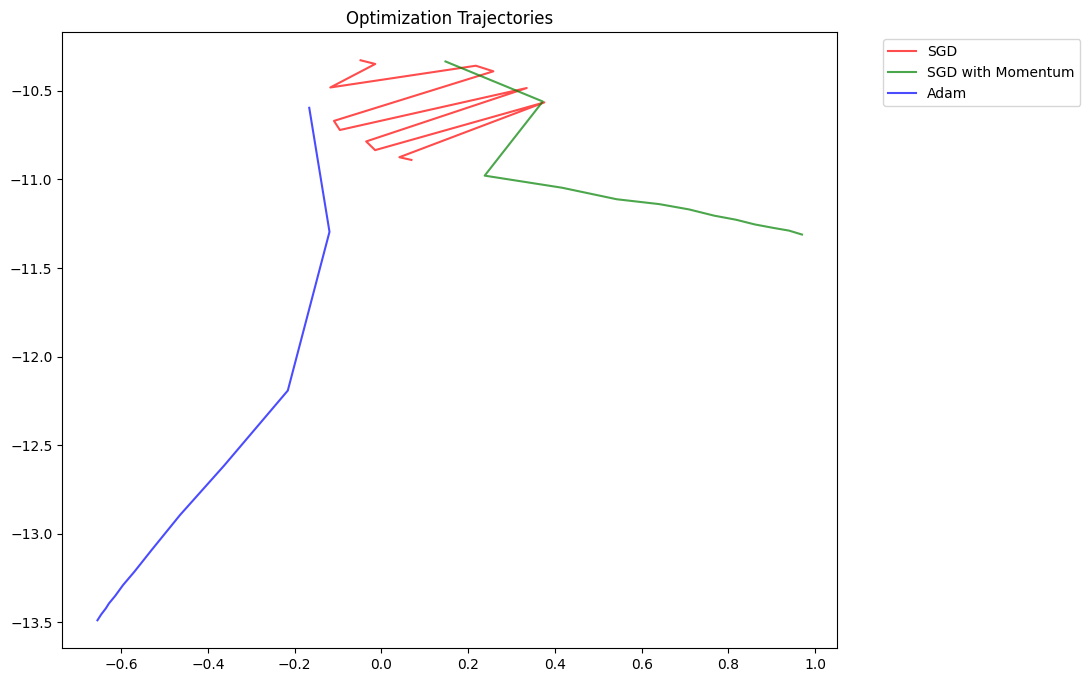

In [9]:
visualize_trajectories(all_trajectories_sst, all_labels_sst, optimizers.keys())
